### **Import Packages**

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np

import pandas as pd

### **Load Data**

Original dataset; Size: 6,28 GB - 26 Disease Types. You can download the dataset at the following link: https://datasets.cellxgene.cziscience.com/e1fd8b32-0855-4ab2-b1c4-3e9dae6fd3b2.h5ad.

In [2]:
# Open the file without RAM involved to later load the whole thing
## = mode 'backed'

#Elodie's path
# adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/adata.h5ad", backed='r') # Make sure to change the path to the file on your computer

#Yara's path
adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/original_dataset_prefrontal_cortex.h5ad", backed='r') # Make sure to change the path to the file on your computer


To see the number of cells for each disease type:

In [52]:
disease_list = list(adata.obs["disease"].cat.categories)

for disease_type in disease_list : 
    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

9681  cells : dementia
13304  cells : dementia || vascular dementia
31871  cells : dementia || vascular dementia || Alzheimer disease
6946  cells : dementia || vascular dementia || Alzheimer disease || diabetes mellitus
4845  cells : dementia || vascular dementia || Alzheimer disease || Parkinson disease
4960  cells : dementia || vascular dementia || diabetes mellitus
175691  cells : dementia || Alzheimer disease
50874  cells : dementia || Alzheimer disease || diabetes mellitus
1406  cells : dementia || Alzheimer disease || diabetes mellitus || Parkinson disease || head injury
28175  cells : dementia || Alzheimer disease || Parkinson disease
7538  cells : dementia || Alzheimer disease || Parkinson disease || Lewy body dementia
11308  cells : dementia || Alzheimer disease || Lewy body dementia
3990  cells : dementia || diabetes mellitus || Parkinson disease
7772  cells : dementia || Parkinson disease
2533  cells : dementia || Parkinson disease || Lewy body dementia || head injury
12193 

### **Dataset's Metadata**

scanpy shows a summary of the dataset's metadata:

In [53]:
print(adata)
print("The dimensions of the adata variable are:", adata.shape)

AnnData object with n_obs × n_vars = 693682 × 34176 backed at '/Users/elodiehusson/Desktop/AD & PD/adata.h5ad'
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organ

The keys of adata.obs are:

In [54]:
print("The keys of adata.obs:", adata.obs.keys())
adata.obs.head()

The keys of adata.obs: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_45-2-AAGTACCGTAGTCGTT-0,R,1611,2701.0,Astro,Astro,Astro_ADAMTSL3,UBERON:0009834,tissue,EFO:0009922,CL:0000127,...,African,MONDO:0001627 || MONDO:0004975,astrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,Z80OyND&?m
Donor_45-2-ACGGTCGTCGAATGCT-0,R,2452,4502.0,Oligo,Oligo,Oligo_RBFOX1,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,African,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,E&Xu<>WI4I
Donor_45-2-ACTACGAGTCCTATAG-0,R,3375,8037.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,^@$VCvP!FS
Donor_45-2-ACTACGATCATTGCCC-0,R,3507,7505.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,#E<kEA<k+*
Donor_45-2-ACTATGGCATGTTACG-0,R,1944,3141.0,Mural,VLMC,VLMC_DCDC2,UBERON:0009834,tissue,EFO:0009922,CL:4023051,...,African,MONDO:0001627 || MONDO:0004975,vascular leptomeningeal cell,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,85-year-old stage,+LQLH5?Y5W


More information about adata.obs, prior to dataset reduction:

#### **How many donors are there?**

In [55]:
adata.obs["donor_id"].value_counts()

n_donors = len(adata.obs["donor_id"].unique())
n_sex = len(adata.obs["sex"].unique())
n_ethnicity = len(adata.obs["genetic_ancestry"].unique())
n_age = len(adata.obs["development_stage"].unique())
n_disease = len(adata.obs["disease"].unique())

print("In the dataset, there are", n_donors, "donors. They are characterized by:", n_sex, "sexes,", n_age, "age ranges,", n_ethnicity, "ethnicities, and", n_disease, "diseases." )

In the dataset, there are 152 donors. They are characterized by: 2 sexes, 28 age ranges, 5 ethnicities, and 26 diseases.


#### **How many donors were male and how many were female?**

In [56]:
print(f"Among the {n_donors} donors, there are :")
print((adata.obs.groupby(["sex"], observed = True)["donor_id"].nunique()))

Among the 152 donors, there are :
sex
female    101
male       51
Name: donor_id, dtype: int64


#### **What were their ages ("development_stage")?**

In [57]:
print(f"Among the {n_donors} donors, there are :")
print((adata.obs.groupby(["development_stage"], observed = True)["donor_id"].nunique()))

Among the 152 donors, there are :
development_stage
54-year-old stage              1
64-year-old stage              1
65-year-old stage              4
66-year-old stage              3
67-year-old stage              2
68-year-old stage              1
69-year-old stage              2
70-year-old stage              1
71-year-old stage              1
72-year-old stage              2
73-year-old stage              3
74-year-old stage              1
75-year-old stage              3
76-year-old stage              3
77-year-old stage              2
78-year-old stage              4
79-year-old stage              7
80 year-old and over stage    52
80-year-old stage              3
81-year-old stage              3
82-year-old stage              7
83-year-old stage              7
84-year-old stage              8
85-year-old stage              8
86-year-old stage              7
87-year-old stage              3
88-year-old stage              7
89-year-old stage              6
Name: donor_id, dtype: i

#### **What were their ethnicities?**

In [58]:
print(f"Among the {n_donors} donors, there are :")
print((adata.obs.groupby(["genetic_ancestry"], observed = True)["donor_id"].nunique()))

Among the 152 donors, there are :
genetic_ancestry
European      26
Asian          1
East Asian     7
African       89
unknown       29
Name: donor_id, dtype: int64


#### To see the genes metadata:

In [59]:
print("adata.var.keys :", adata.var.keys())

adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


,gene_name,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000000003,TSPAN6,256237,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,TNMD,21369,False,TNMD,NCBITaxon:9606,gene,873,protein_coding


#### To see the keys for the embeddings (UMAP, PCA, ...) and other diverse information:

In [60]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


#### To visualize the corresponding UMAP, remove the #:

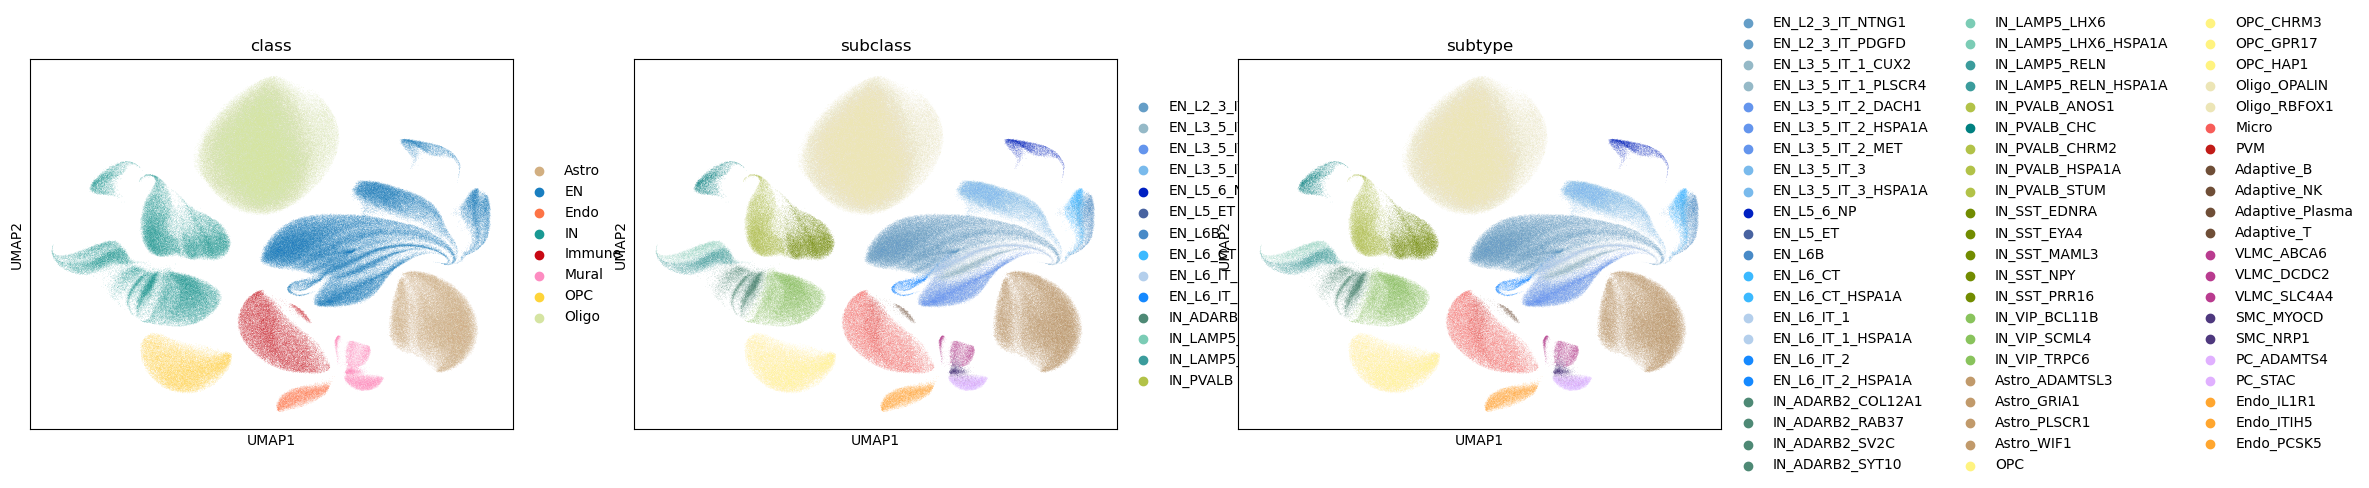

In [61]:
# sc.pl.umap(adata, color ='cell_type')

# sc.pl.umap(adata, color = 'disease')

# sc.pl.umap(adata, color = 'AD_status')

# sc.pl.umap(adata, color = 'sex')

sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

## **Data selection: AD + PD + normal**

We're only selecting cells from the following donors:
- AD: Alzehimer's Disease
- PD: Parkinson's Disease
- Normal

The dataset being too large for our consequent analysis, we decided to reduce it. To do so, we removed all cells taken from African donors and donors from unknown ethnicities for all 3 conditions, as they make up most of the donors. This is important to note and should be kept in mind while interpreting our analysis' results.


In [3]:
is_AD = (adata.obs['disease'] == "dementia || Alzheimer disease") & (adata.obs['genetic_ancestry'] != "African") & (adata.obs['genetic_ancestry'] != "unknown")
is_PD = (adata.obs['disease'] == "dementia || Parkinson disease") & (adata.obs['genetic_ancestry'] != "African")
is_CTRL = (adata.obs['disease'] == "normal") & (adata.obs['genetic_ancestry'] != "African") & (adata.obs['genetic_ancestry'] != "unknown")

# Getting the index of each mask (i.e. the positions in the AnnData object)
AD_idx = np.flatnonzero(is_AD)
PD_idx = np.flatnonzero(is_PD)
CTRL_idx = np.flatnonzero(is_CTRL)

# Randomly mixing indices
np.random.shuffle(AD_idx)
np.random.shuffle(PD_idx)
np.random.shuffle(CTRL_idx)

# Choosing the final indices of samples to keep in the reduced dataset
final_idx = np.concatenate([AD_idx, PD_idx, CTRL_idx])

adata_sub = adata[final_idx, :]
adata_sub.obs

,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_1001-2-AATTCCTAGGAATTAC-0,R,8341,36799.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,Asian,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,)G1F3!cia8
Donor_638-2-GTGTGATTCATGAGGG-1,R,2804,6531.0,Astro,Astro,Astro_WIF1,UBERON:0009834,tissue,EFO:0009922,CL:0000127,...,East Asian,MONDO:0001627 || MONDO:0004975,astrocyte,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,87-year-old stage,!A=@%epv(!
Donor_333-2-TTGGTTTGTCTACTGA-0,R,3485,9394.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,East Asian,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,89-year-old stage,BHnMKRph{a
Donor_865-1-GGGAAGTTCACCGGGT-0,R,3199,7845.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,East Asian,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,2D_(TKW)QT
Donor_865-2-ACCTGTCAGTAGGATT-1,R,2301,4683.0,Oligo,Oligo,Oligo_RBFOX1,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,East Asian,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,69-year-old stage,#WQS$(~4(i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Donor_609-1-TGTACAGTCGAATCCA-0,R,1946,3206.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,European,PATO:0000461,oligodendrocyte,10x 3' v3,normal,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,rr$M%LRRB@
Donor_721-2-TCGCTCAGTACAACGG-1,R,1710,2800.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,European,PATO:0000461,oligodendrocyte,10x 3' v3,normal,male,dorsolateral prefrontal cortex,unknown,86-year-old stage,@4p_fRcNIa
Donor_1146-2-TCTGTCGAGAGGTCAC-1,R,1529,2331.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,European,PATO:0000461,oligodendrocyte,10x 3' v3,normal,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,zAWc8^PBrs


To confirm that we only kept the 3 conditions of interest:

In [4]:
adata_sub.obs["disease"].value_counts()

disease
normal                           37331
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
Name: count, dtype: int64

## **Reduced Dataset's Metadata**
#### **How many donors are there?**

In [5]:
n_donors_sub = len(adata_sub.obs["donor_id"].unique())
n_cells_sub = adata_sub.shape[0]
print("There are", n_donors_sub, "donors and", n_cells_sub, "cells in the reduced dataset.")

There are 17 donors and 77052 cells in the reduced dataset.


#### **How many donors per disease? What were their gender, ethnicity, and age?**

In [46]:
# Gender distribution by disease in the reduced dataset
donors_by_disease_and_sex = (adata_sub.obs.groupby(["disease", "sex"], observed=True)["donor_id"].nunique())

donors_by_disease_and_sex

disease                        sex   
dementia || Alzheimer disease  female    4
                               male      4
dementia || Parkinson disease  female    1
                               male      2
normal                         female    3
                               male      3
Name: donor_id, dtype: int64

In [47]:
# Ethnicity distribution by disease in the reduced dataset
donors_by_disease_and_ethnicity = (adata_sub.obs.groupby(["disease", "genetic_ancestry"], observed=True)["donor_id"].nunique())

donors_by_disease_and_ethnicity

disease                        genetic_ancestry
dementia || Alzheimer disease  European            3
                               Asian               1
                               East Asian          4
dementia || Parkinson disease  European            1
                               East Asian          2
normal                         European            6
Name: donor_id, dtype: int64

In [48]:
# Age distribution by disease in the reduced dataset
donors_by_disease_and_age = (adata_sub.obs.groupby(["disease", "development_stage"], observed=True)["donor_id"].nunique())

donors_by_disease_and_age

disease                        development_stage         
dementia || Alzheimer disease  69-year-old stage             1
                               80 year-old and over stage    2
                               82-year-old stage             1
                               84-year-old stage             1
                               86-year-old stage             1
                               87-year-old stage             1
                               89-year-old stage             1
dementia || Parkinson disease  65-year-old stage             1
                               80 year-old and over stage    1
                               87-year-old stage             1
normal                         77-year-old stage             1
                               79-year-old stage             1
                               80 year-old and over stage    3
                               86-year-old stage             1
Name: donor_id, dtype: int64

## **Saving the Reduced Dataset**

In [6]:
# 1min17
# Elodie's path
# adata_sub.write("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad", compression="gzip") 
# Yara's path
adata_sub.write("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad", compression="gzip") 